## Plotting Risk Flow

Steps to create a visualization of risk flow from risk flow matrix

In [47]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
from shapely.geometry import LineString
import math
import matplotlib.pyplot as plt

## Preprocessing the data：
risk_flow_matrix -> flows_df

In [18]:
risk_flow_matrix = pd.read_csv('risk_flow_matrix.csv')
risk_flow_matrix

,GEOID,17091011700,17091011800,17119400951,17119400952,17135957500,17119401100,17119401500,17119401722,17189950200,...,17037000900,17037001600,17037000500,17037001700,17037001900,17037000100,17037001500,17037000400,17037000300,17037000200
0,17091011700,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,17091011800,0.000003,0.000026,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,17119400951,0.000000,0.000000,0.000150,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,17119400952,0.000000,0.000000,0.000022,0.000002,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,17135957500,0.000000,0.000000,0.000000,0.000000,0.000019,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17037000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000010,0.000000,0.0,0.0,0.000126,0.000002,0.000000,0.000000,0.000005
3119,17037001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000002,0.000002,0.0,0.0,0.000000,0.000036,0.000000,0.000002,0.000000
3120,17037000400,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000005,0.000007,0.0,0.0,0.000000,0.000013,0.000006,0.000007,0.000000
3121,17037000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000002,0.0,0.0,0.000000,0.000000,0.000000,0.000009,0.000000


Find all risk flows that are greater than zero. Append the origin and destination of the risk flow and the risk flow magnitude to a list

In [19]:
flows = []
n = len(risk_flow_matrix)
cols = risk_flow_matrix.columns[1:].values.tolist()

for i in range(n):
    for j in cols:
        if risk_flow_matrix.loc[i, j] > 0:
            x = risk_flow_matrix.loc[i, 'GEOID']
            y = j
            val = risk_flow_matrix.loc[i, j]
            flows.append([str(x), y, val])

In [20]:
flows_df = pd.DataFrame(flows)
flows_df.columns = ['START','END','RISK_FLOW']
flows_df.head()

,START,END,RISK_FLOW
0,17091011700,17091011700,0.000003
1,17091011700,17091010800,0.000013
2,17091011700,17091012100,0.000049
3,17091011700,17091012500,0.000016
4,17091011700,17091011900,0.000016


In [13]:
len(flows_df)

78871

In [21]:
flows_df.to_csv('flows_df.csv')

### Read the dataset

In [27]:
flows_df = pd.read_csv('flows_df.csv')
flows_df = flows_df[['START', 'END', 'RISK_FLOW']]

# change the type to string
flows_df.loc[:,'START'] = flows_df.loc[:,'START'].astype(str)
flows_df.loc[:,'END'] = flows_df.loc[:,'END'].astype(str)
flows_df

,START,END,RISK_FLOW
0,17091011700,17091011700,0.000003
1,17091011700,17091010800,0.000013
2,17091011700,17091012100,0.000049
3,17091011700,17091012500,0.000016
4,17091011700,17091011900,0.000016
...,...,...,...
78866,17037000200,17037000600,0.000007
78867,17037000200,17037000700,0.000007
78868,17037000200,17037000100,0.000020
78869,17037000200,17037000300,0.000002


In [49]:
tracts = pd.read_csv("tracts_4.csv")
tracts = gp.GeoDataFrame(tracts.loc[:,('GEOID', 'geometry')])
tracts

,GEOID,geometry
0,17091011700,"POLYGON ((-87.887682 41.13594, -87.887643 41.1..."
1,17091011800,"POLYGON ((-87.89409599999999 41.143875, -87.89..."
2,17119400951,POLYGON ((-90.11191599999999 38.70280899999999...
3,17119400952,"POLYGON ((-90.09442 38.720308, -90.093604 38.7..."
4,17135957500,"POLYGON ((-89.70369199999999 39.34803, -89.699..."
...,...,...
3118,17037000100,"POLYGON ((-88.734881 42.106204, -88.7348329999..."
3119,17037001500,"POLYGON ((-88.78378499999999 41.849066, -88.77..."
3120,17037000400,"POLYGON ((-88.783531 42.064252, -88.7834979999..."
3121,17037000300,"POLYGON ((-88.94214599999999 42.06505, -88.942..."


In [50]:
# Returns a GeoSeries of points for each geometric centroid.
tracts['geometry'] = tracts['geometry'].centroid

AttributeError: 'Series' object has no attribute 'centroid'

In [20]:
tracts.columns = ['START','geometry']
tracts.iloc[0,0]

'17091011700'

Associate the GEOID of the census tracts with their geospatial data

In [24]:
joined = flows_df.join(tracts.set_index('START'), on = 'START')

In [26]:
joined = joined.rename(columns = {'geometry' : 'START_GEOMETRY'})

In [29]:
joined

,START,END,RISK_FLOW,START_GEOMETRY
0,17091011700,17091011700,0.000003,POINT (-87.87355 41.12949)
1,17091011700,17091010800,0.000013,POINT (-87.87355 41.12949)
2,17091011700,17091012100,0.000049,POINT (-87.87355 41.12949)
3,17091011700,17091012500,0.000016,POINT (-87.87355 41.12949)
4,17091011700,17091011900,0.000016,POINT (-87.87355 41.12949)
...,...,...,...,...
78866,17037000200,17037000600,0.000007,POINT (-88.82573 42.11145)
78867,17037000200,17037000700,0.000007,POINT (-88.82573 42.11145)
78868,17037000200,17037000100,0.000020,POINT (-88.82573 42.11145)
78869,17037000200,17037000300,0.000002,POINT (-88.82573 42.11145)


In [31]:
tracts.columns = ['END','geometry']

In [32]:
tracts

,END,geometry
0,17091011700,POINT (-87.87355 41.12949)
1,17091011800,POINT (-87.87646 41.13978)
2,17119400951,POINT (-90.09829 38.72763)
3,17119400952,POINT (-90.08180 38.72984)
4,17135957500,POINT (-89.60390 39.38915)
...,...,...
3118,17037000100,POINT (-88.65253 42.10661)
3119,17037001500,POINT (-88.73721 41.88417)
3120,17037000400,POINT (-88.68023 42.02216)
3121,17037000300,POINT (-88.86924 41.96281)


In [33]:
joined2 = joined.join(tracts.set_index('END'), on = 'END')

In [35]:
joined2 = joined2.rename(columns = {'geometry' : 'END_GEOMETRY'})

In [42]:
joined2

,START,END,RISK_FLOW,START_GEOMETRY,END_GEOMETRY
0,17091011700,17091011700,0.000003,POINT (-87.87355 41.12949),POINT (-87.87355 41.12949)
1,17091011700,17091010800,0.000013,POINT (-87.87355 41.12949),POINT (-87.70955 41.14835)
2,17091011700,17091012100,0.000049,POINT (-87.87355 41.12949),POINT (-87.89061 41.12322)
3,17091011700,17091012500,0.000016,POINT (-87.87355 41.12949),POINT (-87.87884 41.08424)
4,17091011700,17091011900,0.000016,POINT (-87.87355 41.12949),POINT (-87.86804 41.14539)
...,...,...,...,...,...
78866,17037000200,17037000600,0.000007,POINT (-88.82573 42.11145),POINT (-88.68183 41.98247)
78867,17037000200,17037000700,0.000007,POINT (-88.82573 42.11145),POINT (-88.70226 41.97375)
78868,17037000200,17037000100,0.000020,POINT (-88.82573 42.11145),POINT (-88.65253 42.10661)
78869,17037000200,17037000300,0.000002,POINT (-88.82573 42.11145),POINT (-88.86924 41.96281)


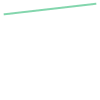

In [46]:

LineString([joined2.loc[1, 'START_GEOMETRY'], joined2.loc[1, 'END_GEOMETRY']])

### Create risk flow-lines from origins and destinations

In [48]:
joined2['FLOWLINES'] = pd.DataFrame([LineString([joined2.loc[i, 'START_GEOMETRY'], joined2.loc[i, 'END_GEOMETRY']]) for i in range(len(joined))])

In [81]:
joined2.to_csv('origin_dest_risk_flow.csv')

In [51]:
risk_flows = joined2.loc[:,('RISK_FLOW','FLOWLINES')]

In [52]:
risk_flows

,RISK_FLOW,FLOWLINES
0,0.000003,LINESTRING (-87.87355269917221 41.129490363897...
1,0.000013,LINESTRING (-87.87355269917221 41.129490363897...
2,0.000049,LINESTRING (-87.87355269917221 41.129490363897...
3,0.000016,LINESTRING (-87.87355269917221 41.129490363897...
4,0.000016,LINESTRING (-87.87355269917221 41.129490363897...
...,...,...
78866,0.000007,LINESTRING (-88.82572682162649 42.111446685104...
78867,0.000007,LINESTRING (-88.82572682162649 42.111446685104...
78868,0.000020,LINESTRING (-88.82572682162649 42.111446685104...
78869,0.000002,LINESTRING (-88.82572682162649 42.111446685104...


In [53]:
risk_flows = gp.GeoDataFrame(risk_flows)

In [57]:
risk_flows.columns = ['RISK_FLOW','geometry']

Plot the risk flows with the census tracts as background

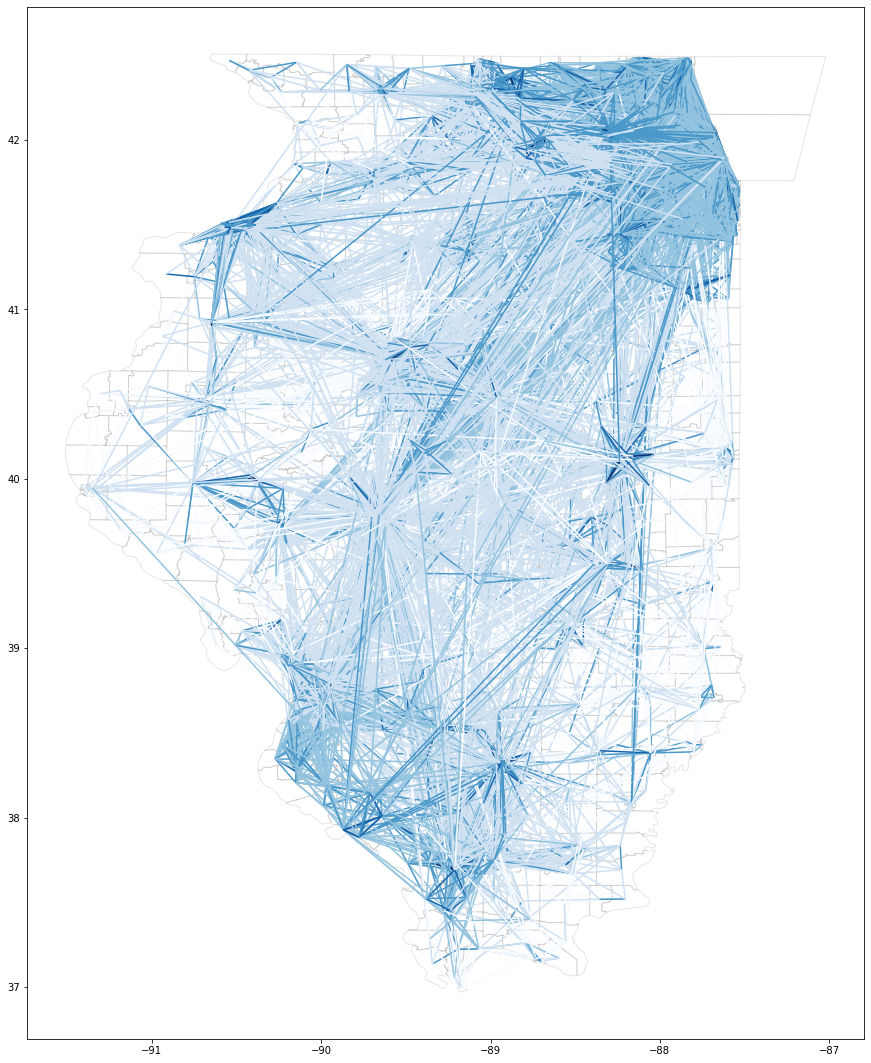

In [59]:
base = tracts.plot(color='white', edgecolor='black', alpha = 0.1, figsize = (15,20))
risk_flows.plot(ax = base, column = 'RISK_FLOW', cmap='Blues', scheme = 'percentiles', markersize = 'RISK_FLOW', figsize = (15,20))
plt.savefig('risk_flows.png', dpi = 200)

In [82]:
risk_flows.to_csv('risk_flows.csv')

In [90]:
risk_flows.crs = "EPSG:4269"

In [91]:
risk_flows.to_file('risk_flows.shp')

In [24]:

risk_flows = gp.read_file('risk_flows.shp')
risk_flows

,RISK_FLOW,geometry
0,0.000003,"LINESTRING (-87.87355 41.12949, -87.87355 41.1..."
1,0.000013,"LINESTRING (-87.87355 41.12949, -87.70955 41.1..."
2,0.000049,"LINESTRING (-87.87355 41.12949, -87.89061 41.1..."
3,0.000016,"LINESTRING (-87.87355 41.12949, -87.87884 41.0..."
4,0.000016,"LINESTRING (-87.87355 41.12949, -87.86804 41.1..."
...,...,...
78866,0.000007,"LINESTRING (-88.82573 42.11145, -88.68183 41.9..."
78867,0.000007,"LINESTRING (-88.82573 42.11145, -88.70226 41.9..."
78868,0.000020,"LINESTRING (-88.82573 42.11145, -88.65253 42.1..."
78869,0.000002,"LINESTRING (-88.82573 42.11145, -88.86924 41.9..."


In [4]:

line = risk_flows.iloc[1, -1]
p = Point(line.bounds[-2], line.bounds[-1])

In [5]:
endPoints = [Point(risk_flows.iloc[i, -1].bounds[-2], risk_flows.iloc[i, -1].bounds[-1])for i in range(len(risk_flows))]

In [25]:
startPoints = [Point(risk_flows.iloc[i, -1].bounds[0], risk_flows.iloc[i, -1].bounds[1])for i in range(len(risk_flows))]

In [26]:
risk_flows['START_POINTS'] = gp.GeoDataFrame(startPoints)

In [28]:
risk_flows['END_POINTS'] = gp.GeoDataFrame(endPoints)

In [29]:
risk_flows

,RISK_FLOW,geometry,START_POINTS,END_POINTS
0,0.000003,"LINESTRING (-87.87355 41.12949, -87.87355 41.1...",POINT (-87.87355269917221 41.129490363897),POINT (-87.87355269917221 41.129490363897)
1,0.000013,"LINESTRING (-87.87355 41.12949, -87.70955 41.1...",POINT (-87.87355269917221 41.129490363897),POINT (-87.70954877200947 41.14834763463207)
2,0.000049,"LINESTRING (-87.87355 41.12949, -87.89061 41.1...",POINT (-87.89060700906691 41.12322058936348),POINT (-87.87355269917221 41.129490363897)
3,0.000016,"LINESTRING (-87.87355 41.12949, -87.87884 41.0...",POINT (-87.87884001713027 41.08423744171369),POINT (-87.87355269917221 41.129490363897)
4,0.000016,"LINESTRING (-87.87355 41.12949, -87.86804 41.1...",POINT (-87.87355269917221 41.129490363897),POINT (-87.8680369611902 41.14539317649774)
...,...,...,...,...
78866,0.000007,"LINESTRING (-88.82573 42.11145, -88.68183 41.9...",POINT (-88.82572682162649 41.98247065533083),POINT (-88.68182948097927 42.11144668510489)
78867,0.000007,"LINESTRING (-88.82573 42.11145, -88.70226 41.9...",POINT (-88.82572682162649 41.97375140956036),POINT (-88.7022585438006 42.11144668510489)
78868,0.000020,"LINESTRING (-88.82573 42.11145, -88.65253 42.1...",POINT (-88.82572682162649 42.10661447085621),POINT (-88.65253487338306 42.11144668510489)
78869,0.000002,"LINESTRING (-88.82573 42.11145, -88.86924 41.9...",POINT (-88.86923820427039 41.96281120956059),POINT (-88.82572682162649 42.11144668510489)


In [30]:
risk_flows.to_csv('risk_flows_origin_dest.csv')

In [10]:
dests = risk_flows.loc[:,('RISK_FLOW','END_POINTS')]

In [31]:
origins = risk_flows.loc[:,('RISK_FLOW','START_POINTS')]

In [11]:
dests = dests.rename(columns = {'END_POINTS' : 'geometry'})

Normalize the risk flow magnitude to better visualize risk flows

In [32]:

dests['NORMALIZED_RISK_FLOW'] = dests['RISK_FLOW'] * 1e6 / 2
origins['NORMALIZED_RISK_FLOW'] = origins['RISK_FLOW'] * 1e6 / 2

In [13]:
dests

,RISK_FLOW,geometry,NORMALIZED_RISK_FLOW
0,0.000003,POINT (-87.87355 41.12949),1.594439
1,0.000013,POINT (-87.70955 41.14835),6.377758
2,0.000049,POINT (-87.87355 41.12949),24.713811
3,0.000016,POINT (-87.87355 41.12949),7.972197
4,0.000016,POINT (-87.86804 41.14539),7.972197
...,...,...,...
78866,0.000007,POINT (-88.68183 42.11145),3.467093
78867,0.000007,POINT (-88.70226 42.11145),3.467093
78868,0.000020,POINT (-88.65253 42.11145),9.823430
78869,0.000002,POINT (-88.82573 42.11145),1.155698


In [35]:
origins = origins.rename(columns = {'START_POINTS' : 'geometry'})
origins

,RISK_FLOW,geometry,NORMALIZED_RISK_FLOW
0,0.000003,POINT (-87.87355 41.12949),1.594439
1,0.000013,POINT (-87.87355 41.12949),6.377758
2,0.000049,POINT (-87.89061 41.12322),24.713811
3,0.000016,POINT (-87.87884 41.08424),7.972197
4,0.000016,POINT (-87.87355 41.12949),7.972197
...,...,...,...
78866,0.000007,POINT (-88.82573 41.98247),3.467093
78867,0.000007,POINT (-88.82573 41.97375),3.467093
78868,0.000020,POINT (-88.82573 42.10661),9.823430
78869,0.000002,POINT (-88.86924 41.96281),1.155698


In [17]:
dests.to_csv('normalized_risk_flow_for_plotting.csv')

In [15]:
tracts = gp.read_file('tl_2019_17_tract.shp')
tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1791332,55670,+41.1403452,-087.8760059,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5169973,169066,+38.7277628,-090.1002620,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17,119,400952,17119400952,4009.52,Census Tract 4009.52,G5020,S,5751299,305906,+38.7301416,-090.0827783,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17,135,957500,17135957500,9575,Census Tract 9575,G5020,S,450037682,512225,+39.3934535,-089.5975234,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17,037,000100,17037000100,1,Census Tract 1,G5020,S,99421738,712972,+42.1046955,-088.6560753,"POLYGON ((-88.73488 42.10620, -88.73483 42.106..."
3119,17,037,001500,17037001500,15,Census Tract 15,G5020,S,38529459,171069,+41.8855370,-088.7392051,"POLYGON ((-88.78378 41.84907, -88.77716 41.860..."
3120,17,037,000400,17037000400,4,Census Tract 4,G5020,S,136874050,1081155,+42.0187609,-088.6804994,"POLYGON ((-88.78353 42.06425, -88.78350 42.064..."
3121,17,037,000300,17037000300,3,Census Tract 3,G5020,S,285569285,465644,+41.9592680,-088.8666313,"POLYGON ((-88.94215 42.06505, -88.94211 42.065..."


Plot destinations of risk flows with census tracts as background

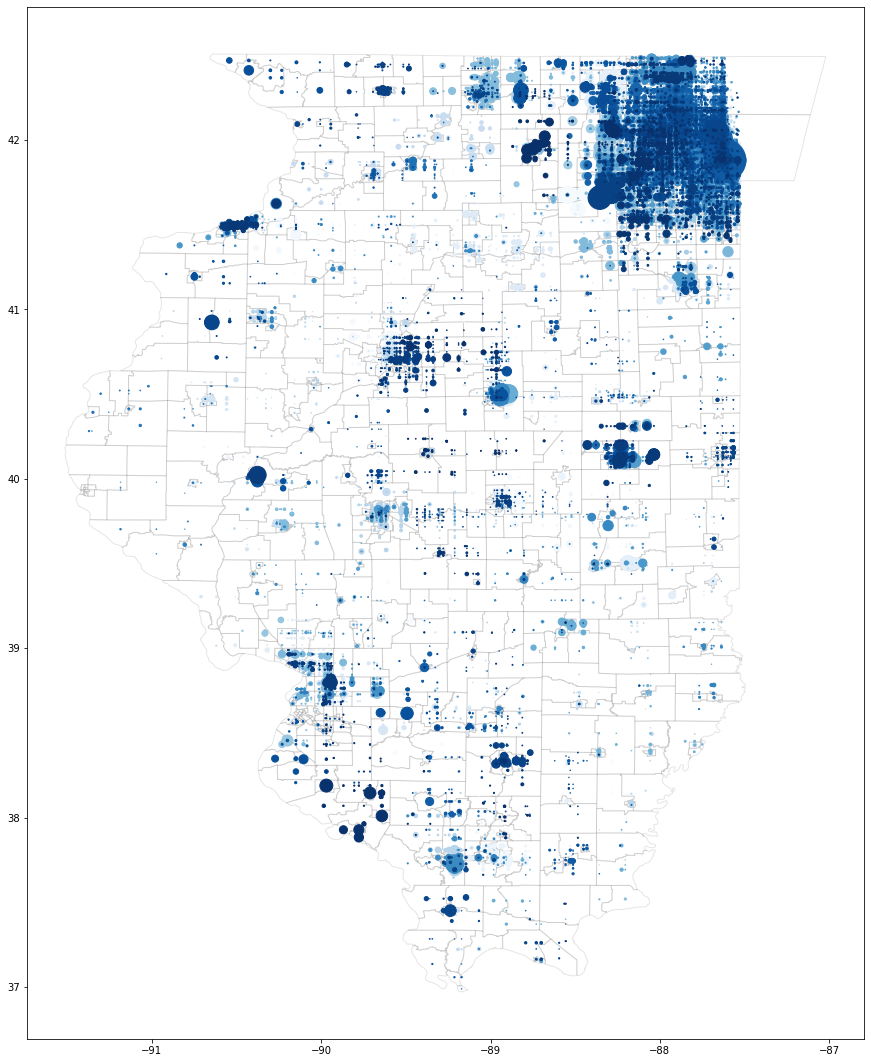

In [47]:
base = tracts.plot(color='white', edgecolor='black', alpha = 0.1, figsize = (15,20))
dests.plot(ax = base, markersize = 'NORMALIZED_RISK_FLOW',cmap='Blues', scheme = 'quantiles', figsize = (15, 20));
plt.savefig('risk_flow_visualization_dests.png', dpi = 200)

Plot origins of risk flows with census tracts as background

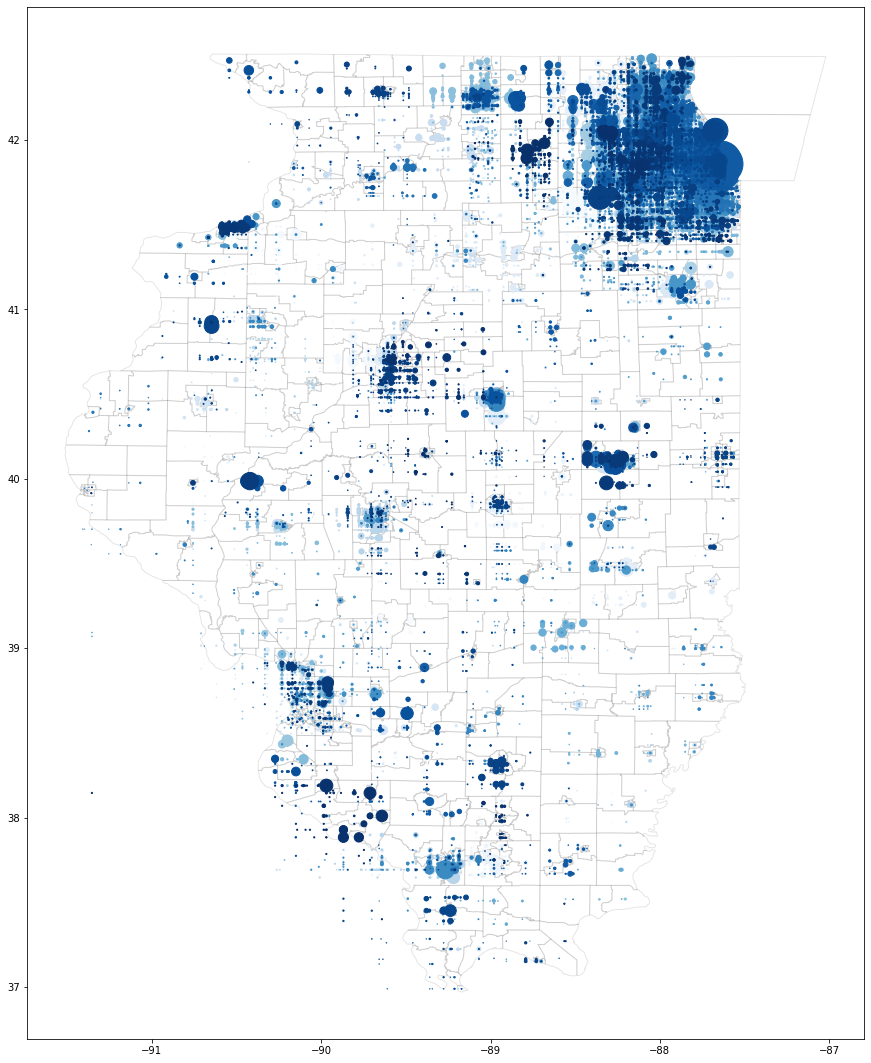

In [48]:
base = tracts.plot(color='white', edgecolor='black', alpha = 0.1, figsize = (15, 20))
origins.plot(ax = base, markersize = 'NORMALIZED_RISK_FLOW',cmap='Blues', scheme = 'quantiles', figsize = (15, 20));
plt.savefig('risk_flow_visualization_origins.png', dpi = 200)